# Comparison of models for predicting stock prices of three companies with LSTM and ARIMA

#### Group Members: Luyao Xu, Ruoxi Sun, Ruoxuan Zhao

# 1. Introduction 
## a. What question are you answering with your project? 
#### When we predict the stock price for different companies, which model performs better, LSTM or ARIMA?
## b. Why should we care about this question? 
#### Forecasting time series data is an important topic in economics, business, and finance. This is often a challenging task due to unprecedented changes in economic trends and incomplete information. As market volatility in recent years has drawn attention to economic and financial time series forecasting, evaluating the accuracy of forecasting methods has become an important topic when various forecasting methods are employed.
#### Traditionally, there are several techniques to effectively forecast the next lag of time series data such as univariate Autoregressive (AR), univariate Moving Average (MA), Simple Exponential Smoothing (SES), and more notably Autoregressive Integrated Moving Average(ARIMA) with its many variations. In particular, the ARIMA model has demonstrated its outperformance in precision and accuracy of predicting the next lags of time series. With the recent advancement in computational power of computers and more importantly development of more advanced machine learning algorithms and approaches such as deep learning,new algorithms are developed to analyze and forecast time series data. The research question investigated in this article is whether and how the newly developed deep learning based algorithms for forecasting time series data, such as “Long Short-Term Memory (LSTM)”, are superior to the traditional algorithms.We tried to use LSTM and ARIMA to predict the stock price of three different companies, evaluated and compared the two methods in an attempt to find the best model for predicting stock price.
## c. Have there been previous papers in the economics literature addressing this question? Summarize previous research briefly. 
#### There is some research which focuses on this question before. Sima, Neda, Akbar (2018) address this question by doing empirical research. They conclude that deep learning-based algorithms such as LSTM outperform traditional-based  algorithms such as ARIMA models. They compare these two models by using the average reduction in error rates. Maryem, Siham, Mounia and Hajar (2019) also compare these two models in the financial area. The prediction variable for that paper is the financial budget. They compare these two models by using the parameters of RMSE, MAE, and MSE.Stoean C, Paja W, Stoean R, Sandita A experimented with LSTM and CNN to predict stock prices and discovered that by improving from 2 layers to 3 layers of CNN didn’t show a significant improvement based on MSE success criterion, however it costed almost twice the running time. On the other hand, when experimenting with LSTM they found that the improvement in performance from 2 to 3 layers is quite significant. Namini,Tavakoli and Namin used different financial time series from Yahoo finance to compare how BiLSTM, ARIMA and LSTM performs. They discovered that a deep-bidirectional LSTM (BiLSTM) has better prediction accuracy compared to LSTM, however it has a slower training process. 

# 2. Data
## a. Describe the source(s) of the data
#### Our data are all from Yahoo Finance. We use the daily closing price for BOA, AT&T, APPLE from January 4th, 2010 to April 10th, 2022. 
## b. Discuss whether you are removing any outliers from your data, or doing any other sampling restrictions 
#### We are not removing any outliers from our data. The reason is that the time series of stock is a special topic compared to others. There are some days the stock price experencing a big profit or big loss, it can be concluded to idiosyncratic risk or systematic risk. We can not just remove them from our model. But keeping them in our model will also cause the problem that our model will focus more on the outliers.  As a result, we transform the data in the next step.
## c. Discuss whether you are transforming the data and/or merging/appending multiple datasets together 
#### Our data is the daily closing price. For the ARIMA Model, we take the log of the stock price and express daily returns in terms of changes to the log price. In most cases, it can give us an approximately normal distribution.  For LSTM models, we scale the data by normalizing the series data. So far, we have preprocessed all the data we need to use in the following two models.

# 3. Modeling 
## a. Analyze the data using 2-3 different model specifications (i.e. with/without covariates, using different definitions of the treatment, outcome, or predictor variables, etc.) 
#### We constructed two models for our project. 
#### The first model is the ARIMA model. We use the logarithm of stock price. Firstly, we test the stationary of the data by doing an ADF test. Also, in order to perform a time series analysis, we can separate seasonality and trend from our series. The resultant series will become stationary through this process. To reduce the magnitude of the values and the growing trend in the series, we first take a log of the series. We then calculate the rolling average of the series after obtaining the log of the series. A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series. And then, we use Auto Arima to determine the best p,d,q parameters and choose the best model with the least AIC. And then we use 65% length of the data as our training data and 35% of the data as our test data. 
#### The second model is the LSTM model. We use 65% length of the data as our training data, and 35% of the data as our test data. We set the time step as 100, which means we are going to use the first 100 data to forecast the 101st data. As we set the parameters of samples, time steps and features for the LSTM model, our model is constructed as below.

## Empirical Outline
#### 1. We will collect the stock data
#### 2. Preprocess the Data -- Train and Test
#### 3. Create an stacked LSTM and ARIMA model
#### 4. Predict the test data and plot the outpot

## Predicting BOA Stock Using LSTM Model

## Step 1

In [1]:
## data collection
import pandas_datareader as pdr
import pandas as pd

In [2]:
df = pd.read_csv('BAC.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.240000,15.750000,15.120000,15.690000,13.406424,180845200
1,2010-01-05,15.740000,16.209999,15.700000,16.200001,13.842199,209521300
2,2010-01-06,16.209999,16.540001,16.030001,16.389999,14.004541,205257900
3,2010-01-07,16.680000,17.190001,16.510000,16.930000,14.465950,320868400
4,2010-01-08,16.980000,17.100000,16.629999,16.780001,14.337782,220104700


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1.shape

(3089,)

In [6]:
df1

0       15.690000
1       16.200001
2       16.389999
3       16.930000
4       16.780001
          ...    
3084    40.830002
3085    40.139999
3086    39.700001
3087    39.389999
3088    39.669998
Name: Close, Length: 3089, dtype: float64

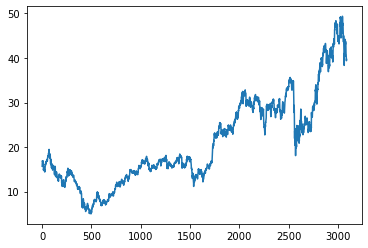

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
## LSTM are sensitive to the scale of the data, so we apply MinMax Scaler
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
##df1 = np.reshape(df1.values, (len(df1),1)) 
scaler=MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(3089, 1)

In [11]:
df1

array([[0.24104528],
       [0.25253437],
       [0.25681457],
       ...,
       [0.78193287],
       [0.77494927],
       [0.78125698]])

## 2d. Show comprehensive summary statistics. 

In [12]:
from scipy import stats
stats.describe(df1)

DescribeResult(nobs=3089, minmax=(array([0.]), array([1.])), mean=array([0.36088406]), variance=array([0.05142695]), skewness=array([0.73414723]), kurtosis=array([-0.18280454]))

## Step 2

In [13]:
## splitting dataset into train and test split
training_size =int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size, test_size

(2007, 1082)

In [15]:
train_data

array([[0.24104528],
       [0.25253437],
       [0.25681457],
       ...,
       [0.55170082],
       [0.55102502],
       [0.55170082]])

In [16]:
import numpy 
## convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ## i=0 0,1,2,3,...99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [17]:
## reshape ino=to X=t, t+1, t+2, t+3,...t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train)

[[0.24104528 0.25253437 0.25681457 ... 0.23451227 0.23653976 0.2360892 ]
 [0.25253437 0.25681457 0.26897949 ... 0.23653976 0.2360892  0.2520838 ]
 [0.25681457 0.26897949 0.26560038 ... 0.2360892  0.2520838  0.24217165]
 ...
 [0.43298037 0.43072765 0.42892545 ... 0.54809641 0.53728316 0.53480512]
 [0.43072765 0.42892545 0.43095293 ... 0.53728316 0.53480512 0.5417887 ]
 [0.42892545 0.43095293 0.43838704 ... 0.53480512 0.5417887  0.55170082]]


In [19]:
print(X_train.shape),print(y_train.shape)

(1906, 100)
(1906,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(981, 100)
(981,)


(None, None)

## Step 3

In [21]:
## reshape input to be[samples, time steps, features] which is required for LSTM
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [22]:
## create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model= Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 [==============================] - 18s 333ms/step - loss: 0.0076 - val_loss: 0.0162
Epoch 2/100
30/30 [==============================] - 8s 272ms/step - loss: 5.6973e-04 - val_loss: 0.0023
Epoch 3/100
30/30 [==============================] - 6s 200ms/step - loss: 3.5124e-04 - val_loss: 0.0020
Epoch 4/100
30/30 [==============================] - 5s 164ms/step - loss: 3.3957e-04 - val_loss: 0.0019
Epoch 5/100
30/30 [==============================] - 5s 162ms/step - loss: 3.1978e-04 - val_loss: 0.0018
Epoch 6/100
30/30 [==============================] - 5s 155ms/step - loss: 3.0415e-04 - val_loss: 0.0023
Epoch 7/100
30/30 [==============================] - 5s 157ms/step - loss: 3.0734e-04 - val_loss: 0.0018
Epoch 8/100
30/30 [==============================] - 5s 158ms/step - loss: 2.8188e-04 - val_loss: 0.0017
Epoch 9/100
30/30 [==============================] - 5s 157ms/step - loss: 2.9702e-04 - val_loss: 0.0016
Epoch 10/100
30/30 [==============================] - 5s 1

## Step 4

In [26]:
import tensorflow as tf

In [27]:
## Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
## Rransformback to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


15.377220826649644

In [30]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

32.612208136803524

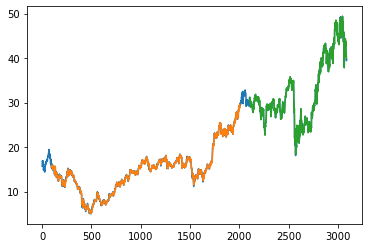

In [31]:
## plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
## plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting BOA Stock Using ARIMA Model

## Step 1

In [32]:
!pip install pmdarima

In [33]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [34]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('BAC.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.240000,15.750000,15.120000,15.690000,13.406424,180845200
2010-01-05,15.740000,16.209999,15.700000,16.200001,13.842199,209521300
2010-01-06,16.209999,16.540001,16.030001,16.389999,14.004541,205257900
2010-01-07,16.680000,17.190001,16.510000,16.930000,14.465950,320868400
2010-01-08,16.980000,17.100000,16.629999,16.780001,14.337782,220104700
...,...,...,...,...,...,...
2022-04-04,40.480000,41.139999,40.160000,40.830002,40.830002,53761700
2022-04-05,40.439999,40.759998,40.040001,40.139999,40.139999,51781700
2022-04-06,39.740002,40.009998,39.349998,39.700001,39.700001,54159800


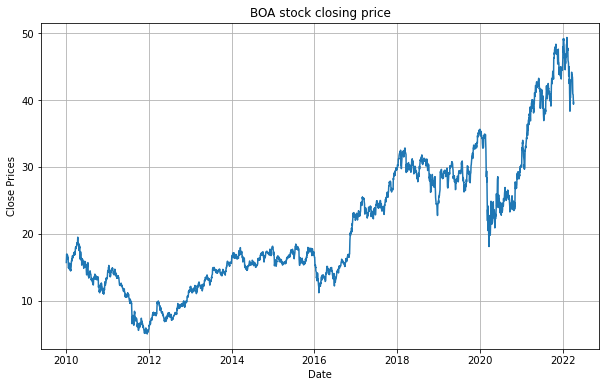

In [35]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('BOA stock closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

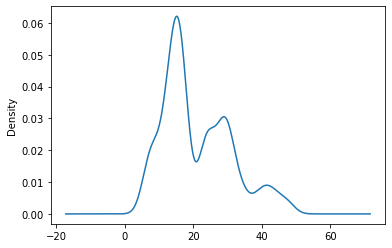

In [36]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

In [37]:
df_close = np.log(df_close)
print(df_close)

Date
2010-01-04    2.753024
2010-01-05    2.785011
2010-01-06    2.796671
2010-01-07    2.829087
2010-01-08    2.820188
                ...   
2022-04-04    3.709417
2022-04-05    3.692373
2022-04-06    3.681351
2022-04-07    3.673512
2022-04-08    3.680595
Name: Close, Length: 3089, dtype: float64


## 2d. Show comprehensive summary statistics.

In [38]:
from scipy import stats
stats.describe(df_close)

DescribeResult(nobs=3089, minmax=(1.6074359097634274, 3.899545504168147), mean=2.927491962298719, variance=0.24575421583441215, skewness=-0.20612759786296608, kurtosis=-0.5069613163767772)

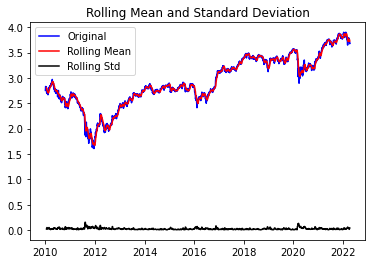

Results of dickey fuller test
Test Statistics                  -0.756343
p-value                           0.831611
No. of lags used                 24.000000
Number of observations used    3064.000000
critical value (1%)              -3.432486
critical value (5%)              -2.862484
critical value (10%)             -2.567272
dtype: float64


In [39]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

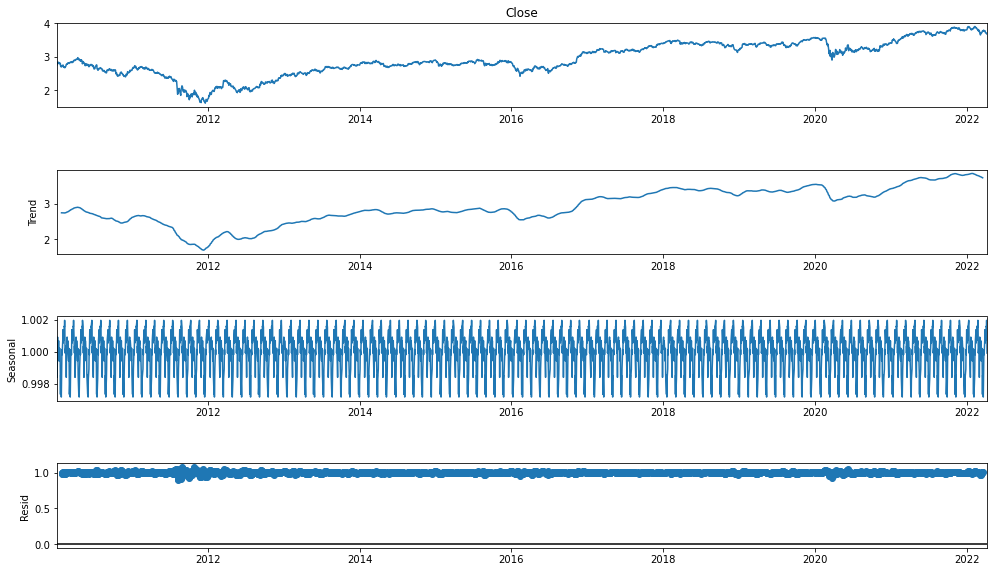

In [40]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


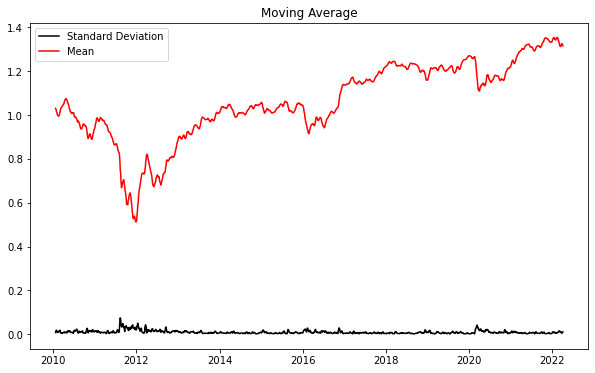

In [41]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

## Step 2

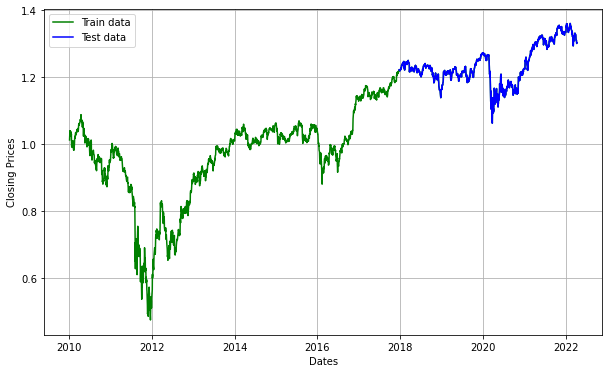

In [42]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.65)], df_log[int(len(df_log)*0.65):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

## Step 3

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12921.993, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12928.837, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12927.838, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12923.819, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12935.133, Time=0.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-12937.560, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-12940.816, Time=0.70 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-12970.249, Time=0.75 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-12968.339, Time=0.87 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-12938.189, Time=0.65 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-12972.028, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-12942.642, Time=0.37 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-12970.116, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-12940.016, Time=0.69 sec

Best

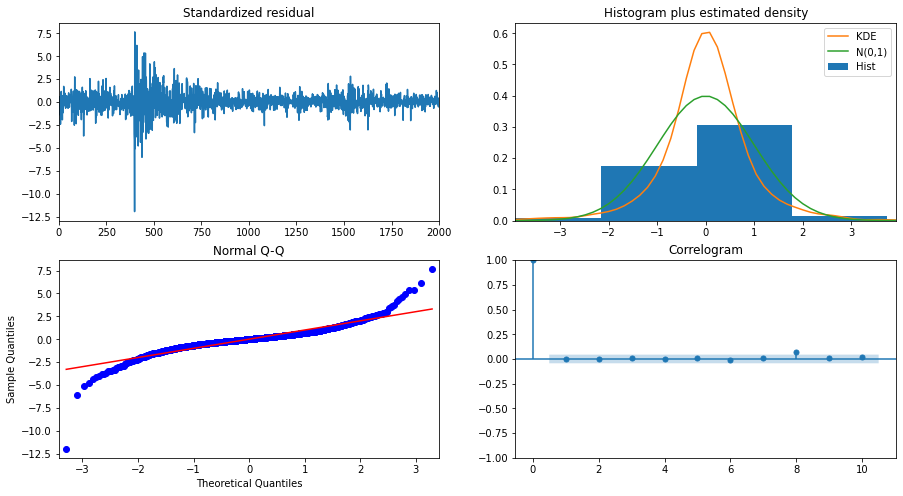

In [43]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [44]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(5,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\glori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\glori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2003
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6492.126
Method:                       css-mle   S.D. of innovations              0.009
Date:                Tue, 03 May 2022   AIC                         -12970.251
Time:                        21:39:17   BIC                         -12931.034
Sample:                             1   HQIC                        -12955.853
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.939e-05      0.000      0.471      0.638      -0.000       0.000
ar.L1.D.Close    -0.0503      0.022     -2.268      0.023      -0.094      -0.007
ar.L2.D.Close     0.0527      0.022     

## Step 4

In [45]:
# Forecast
fc, se, conf = fitted.forecast(1082, alpha=0.05)  # 95% conf

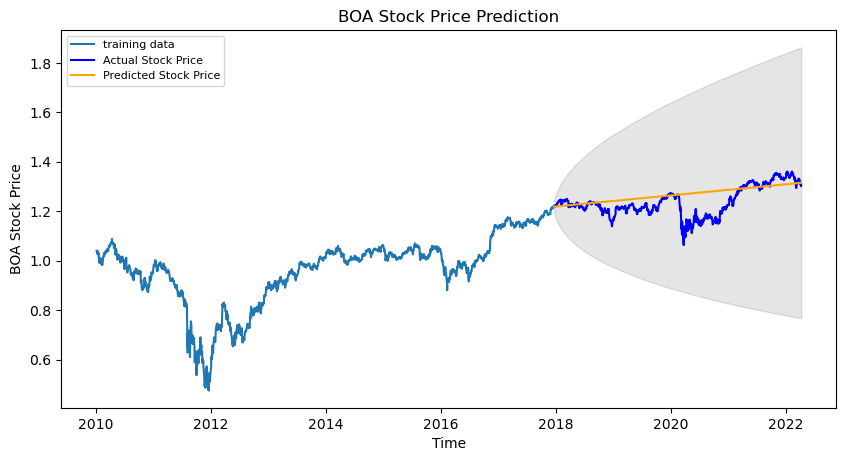

In [46]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BOA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BOA Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [47]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.003337677185719583
MAE: 0.041339265498565675
RMSE: 0.057772633536299724
MAPE: 0.034582762632180186


## Predicting AT&T Stock Using LSTM Model

## Step 1

In [48]:
## data collection
import pandas_datareader as pdr
import pandas as pd

In [49]:
df = pd.read_csv('T.csv')

In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,21.457705,21.608761,21.359516,21.586103,10.498002,38576858
1,2010-01-05,21.676737,21.699396,21.412388,21.480364,10.446581,46650478
2,2010-01-06,21.110271,21.170694,20.808157,20.853474,10.293718,50172450
3,2010-01-07,20.830816,20.913897,20.483383,20.619335,10.178142,44486797
4,2010-01-08,20.611782,20.687311,20.302114,20.468279,10.103578,36586622


In [51]:
df1=df.reset_index()['Close']

In [52]:
df1.shape

(3089,)

In [53]:
df1

0       21.586103
1       21.480364
2       20.853474
3       20.619335
4       20.468279
          ...    
3084    18.262840
3085    18.043806
3086    18.149548
3087    17.922960
3088    18.232628
Name: Close, Length: 3089, dtype: float64

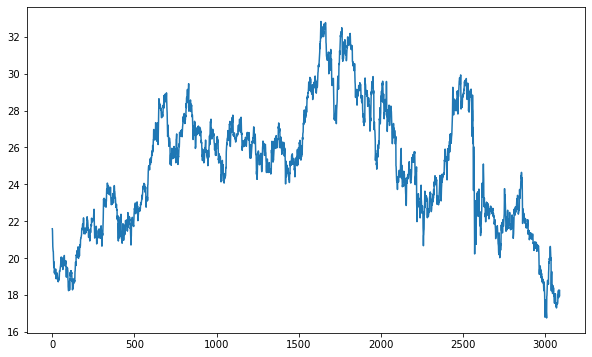

In [54]:
plt.plot(df1)

In [55]:
## LSTM are sensitive to the scale of the data, so we apply MinMax Scaler
import numpy as np

In [56]:
from sklearn.preprocessing import MinMaxScaler
##df1 = np.reshape(df1.values, (len(df1),1)) 
scaler=MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [57]:
df1.shape

(3089, 1)

In [58]:
df1

array([[0.30093901],
       [0.29436631],
       [0.25539906],
       ...,
       [0.08732402],
       [0.0732394 ],
       [0.09248824]])

## 2d. Show comprehensive summary statistics.

In [59]:
from scipy import stats
stats.describe(df1)

DescribeResult(nobs=3089, minmax=(array([0.]), array([1.])), mean=array([0.50648861]), variance=array([0.04378857]), skewness=array([-0.01705584]), kurtosis=array([-0.59748061]))

## Step 2

In [60]:
## splitting dataset into train and test split
training_size =int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [61]:
training_size, test_size

(2007, 1082)

In [62]:
train_data

array([[0.30093901],
       [0.29436631],
       [0.25539906],
       ...,
       [0.76478877],
       [0.74553992],
       [0.76901413]])

In [63]:
import numpy 
## convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ## i=0 0,1,2,3,...99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [64]:
## reshape ino=to X=t, t+1, t+2, t+3,...t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [65]:
print(X_train)

[[0.30093901 0.29436631 0.25539906 ... 0.10610332 0.10093897 0.09201888]
 [0.29436631 0.25539906 0.24084507 ... 0.10093897 0.09201888 0.1154929 ]
 [0.25539906 0.24084507 0.23145548 ... 0.09201888 0.1154929  0.09999999]
 ...
 [0.74460094 0.8093898  0.79014095 ... 0.74788744 0.74507043 0.73098599]
 [0.8093898  0.79014095 0.79014095 ... 0.74507043 0.73098599 0.75446014]
 [0.79014095 0.79014095 0.78450711 ... 0.73098599 0.75446014 0.76478877]]


In [66]:
print(X_train.shape),print(y_train.shape)

(1906, 100)
(1906,)


(None, None)

In [67]:
print(X_test.shape), print(ytest.shape)

(981, 100)
(981,)


(None, None)

## Step 3

In [68]:
## reshape input to be[samples, time steps, features] which is required for LSTM
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [69]:
## create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [70]:
model= Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 [==============================] - 9s 189ms/step - loss: 0.0494 - val_loss: 0.0108
Epoch 2/100
30/30 [==============================] - 5s 155ms/step - loss: 0.0044 - val_loss: 0.0058
Epoch 3/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 4/100
30/30 [==============================] - 5s 160ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 5/100
30/30 [==============================] - 5s 162ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 6/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 7/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 8/100
30/30 [==============================] - 5s 161ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 9/100
30/30 [==============================] - 5s 160ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 10/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0017 - val_lo

## Step 4

In [73]:
import tensorflow as tf

In [74]:
## Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [75]:
## Rransformback to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [76]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.610811800382308

In [77]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

23.011220793048146

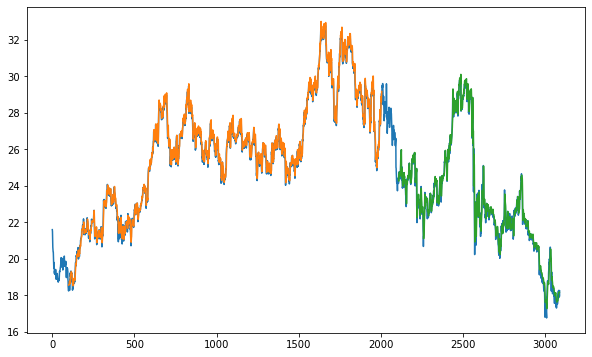

In [78]:
## plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
## plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting AT&T Stock Using ARIMA Model

## Step 1

In [79]:
!pip install pmdarima

In [80]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [81]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('T.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.457705,21.608761,21.359516,21.586103,10.498002,38576858
2010-01-05,21.676737,21.699396,21.412388,21.480364,10.446581,46650478
2010-01-06,21.110271,21.170694,20.808157,20.853474,10.293718,50172450
2010-01-07,20.830816,20.913897,20.483383,20.619335,10.178142,44486797
2010-01-08,20.611782,20.687311,20.302114,20.468279,10.103578,36586622
...,...,...,...,...,...,...
2022-04-04,18.013596,18.277946,17.802114,18.262840,18.003277,47195569
2022-04-05,18.104231,18.240181,18.013596,18.043806,17.787355,43936808
2022-04-06,17.960726,18.232628,17.824774,18.149548,17.891594,49327209


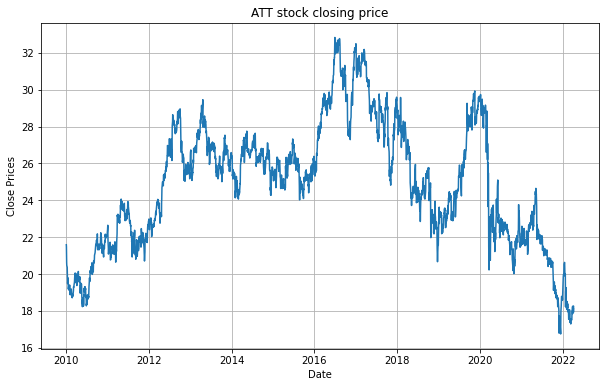

In [82]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ATT stock closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

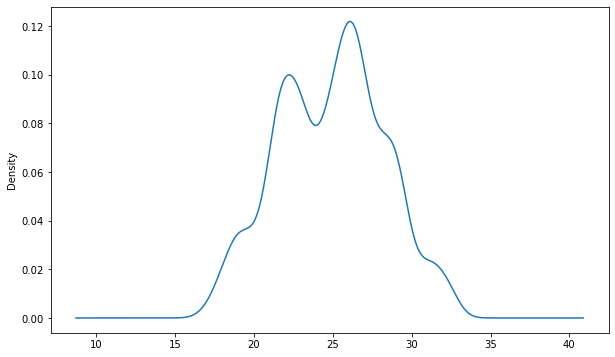

In [83]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

In [84]:
df_close = np.log(df_close)
print(df_close)

Date
2010-01-04    3.072050
2010-01-05    3.067139
2010-01-06    3.037521
2010-01-07    3.026229
2010-01-08    3.018876
                ...   
2022-04-04    2.904868
2022-04-05    2.892802
2022-04-06    2.898646
2022-04-07    2.886083
2022-04-08    2.903213
Name: Close, Length: 3089, dtype: float64


## 2d. Show comprehensive summary statistics.

In [85]:
from scipy import stats
stats.describe(df_close)

DescribeResult(nobs=3089, minmax=(2.8180825666546756, 3.491413548378453), mean=3.205218307640543, variance=0.019017404142950747, skewness=-0.30745177893225695, kurtosis=-0.48178027835236525)

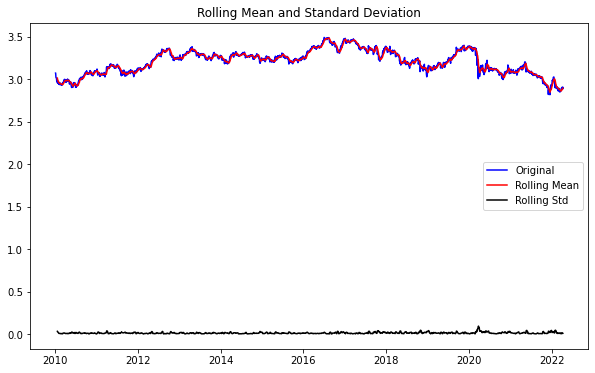

Results of dickey fuller test
Test Statistics                  -1.903581
p-value                           0.330378
No. of lags used                 13.000000
Number of observations used    3075.000000
critical value (1%)              -3.432478
critical value (5%)              -2.862480
critical value (10%)             -2.567271
dtype: float64


In [86]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

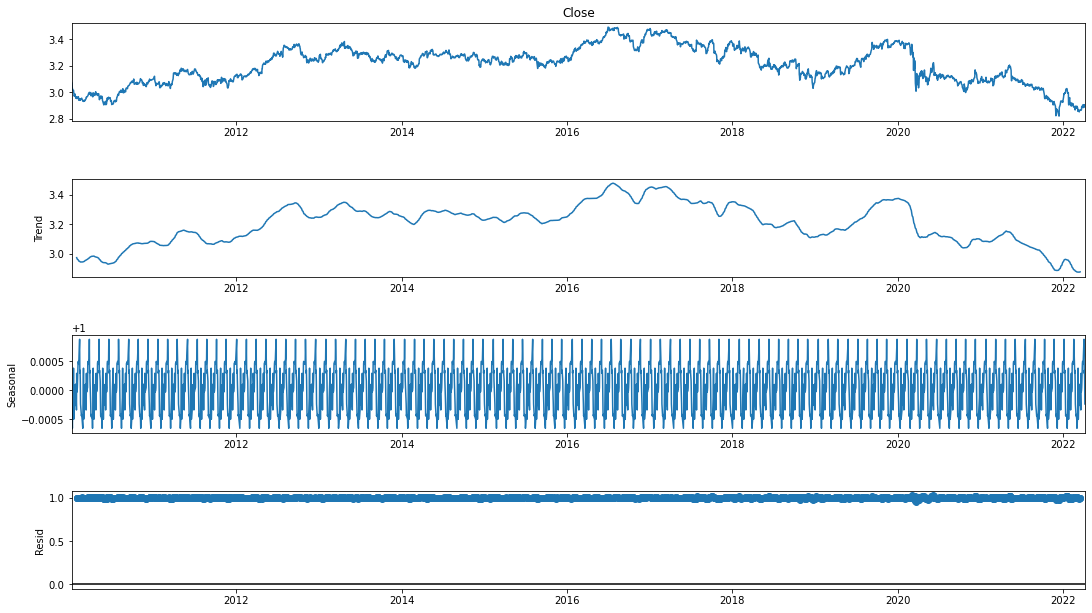

In [87]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


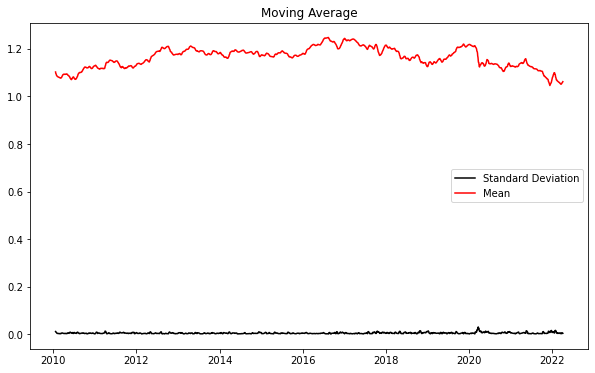

In [88]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

## Step 2

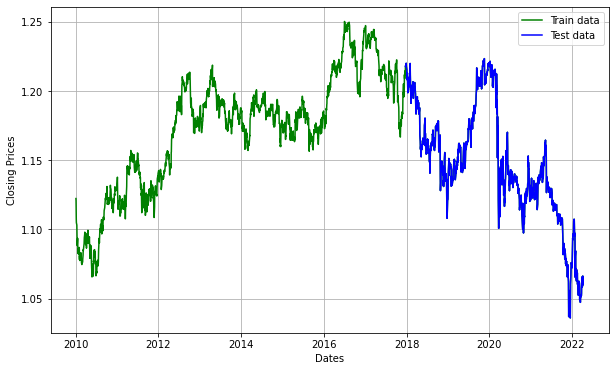

In [89]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.65)], df_log[int(len(df_log)*0.65):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

## Step 3

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17442.722, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17440.731, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17440.730, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17444.119, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17438.720, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.381 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2004
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8723.059
Date:                Tue, 03 May 2022   AIC                         -17444.119
Time:                        21:48:18   BIC                         -17438.516
Sample:                             0   HQIC                        -17442.062
                               - 2004                             

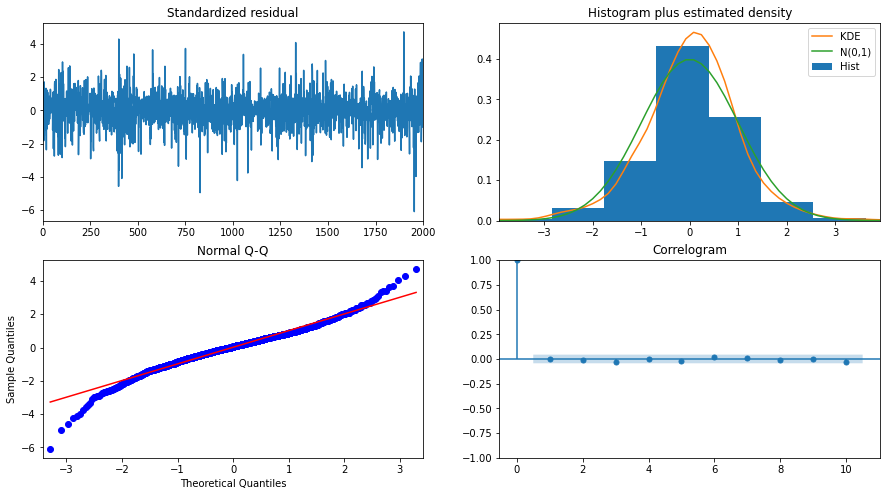

In [90]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [91]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2003
Model:                 ARIMA(0, 1, 0)   Log Likelihood                8723.361
Method:                           css   S.D. of innovations              0.003
Date:                Tue, 03 May 2022   AIC                         -17442.722
Time:                        21:48:19   BIC                         -17431.517
Sample:                             1   HQIC                        -17438.608
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.391e-05   6.94e-05      0.777      0.437   -8.22e-05       0.000


## Step 4

In [92]:
# Forecast
fc, se, conf = fitted.forecast(1082, alpha=0.05)  # 95% conf

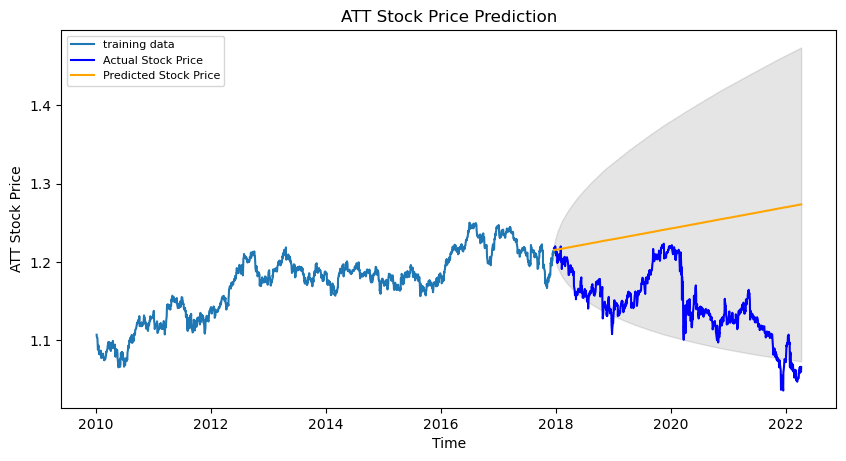

In [93]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ATT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ATT Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [94]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.012606892621334803
MAE: 0.09797662950764302
RMSE: 0.11228041958121997
MAPE: 0.08728757410433156


## 4b. Are your findings robust to different model specifications?
#### We changed the time period in an attempt to get the effect of changing the independent variable, to test whether our findings were still robust to different model specifications.

## Predicting AT&T Stock Using LSTM Model


## Step 1

In [95]:
## data collection
import pandas_datareader as pdr
import pandas as pd

In [96]:
df = pd.read_csv('T1.csv')

In [97]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.740181,25.944109,25.679758,25.944109,17.577383,42076058
1,2016-01-05,25.944109,26.200907,25.770393,26.125378,17.700195,40656465
2,2016-01-06,25.543806,25.838369,25.468279,25.725077,17.674246,35631223
3,2016-01-07,25.392750,25.755287,25.309668,25.309668,17.388844,46487494
4,2016-01-08,25.506042,25.649548,25.234138,25.332327,17.404419,37192219


In [98]:
df1=df.reset_index()['Close']

In [99]:
df1.shape

(1579,)

In [100]:
df1

0       25.944109
1       26.125378
2       25.725077
3       25.309668
4       25.332327
          ...    
1574    18.262840
1575    18.043806
1576    18.149548
1577    17.922960
1578    18.232628
Name: Close, Length: 1579, dtype: float64

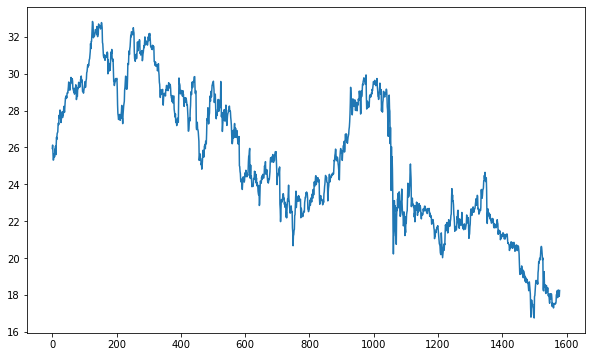

In [101]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [102]:
## LSTM are sensitive to the scale of the data, so we apply MinMax Scaler
import numpy as np

In [103]:
from sklearn.preprocessing import MinMaxScaler
##df1 = np.reshape(df1.values, (len(df1),1)) 
scaler=MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [104]:
df1.shape

(1579, 1)

In [105]:
df1

array([[0.57183105],
       [0.58309866],
       [0.5582161 ],
       ...,
       [0.08732402],
       [0.0732394 ],
       [0.09248824]])

## 2d. Show comprehensive summary statistics.

In [106]:
from scipy import stats
stats.describe(df1)

DescribeResult(nobs=1579, minmax=(array([0.]), array([1.])), mean=array([0.53703959]), variance=array([0.05767806]), skewness=array([-0.05223979]), kurtosis=array([-0.97608253]))

## Step 2

In [107]:
## splitting dataset into train and test split
training_size =int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [108]:
training_size, test_size

(1026, 553)

In [109]:
train_data

array([[0.57183105],
       [0.58309866],
       [0.5582161 ],
       ...,
       [0.77042261],
       [0.69859156],
       [0.716432  ]])

In [110]:
import numpy 
## convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ## i=0 0,1,2,3,...99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [111]:
## reshape ino=to X=t, t+1, t+2, t+3,...t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [112]:
print(X_train)

[[0.57183105 0.58309866 0.5582161  ... 0.75821601 0.76666674 0.77230051]
 [0.58309866 0.5582161  0.53239443 ... 0.76666674 0.77230051 0.78262908]
 [0.5582161  0.53239443 0.5338029  ... 0.77230051 0.78262908 0.78967146]
 ...
 [0.62018782 0.63615023 0.64413146 ... 0.79201879 0.77277    0.76666674]
 [0.63615023 0.64413146 0.66103291 ... 0.77277    0.76666674 0.75492969]
 [0.64413146 0.66103291 0.68638497 ... 0.76666674 0.75492969 0.77042261]]


In [113]:
print(X_train.shape),print(y_train.shape)

(925, 100)
(925,)


(None, None)

In [114]:
print(X_test.shape), print(ytest.shape)

(452, 100)
(452,)


(None, None)

## Step 3

In [115]:
## reshape input to be[samples, time steps, features] which is required for LSTM
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [116]:
## create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [117]:
model= Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 213ms/step - loss: 0.0958 - val_loss: 0.0039
Epoch 2/100
15/15 [==============================] - 2s 148ms/step - loss: 0.0141 - val_loss: 0.0099
Epoch 3/100
15/15 [==============================] - 2s 151ms/step - loss: 0.0078 - val_loss: 0.0163
Epoch 4/100
15/15 [==============================] - 2s 154ms/step - loss: 0.0050 - val_loss: 0.0091
Epoch 5/100
15/15 [==============================] - 2s 169ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 6/100
15/15 [==============================] - 2s 163ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/100
15/15 [==============================] - 2s 164ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 8/100
15/15 [==============================] - 2s 166ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 9/100
15/15 [==============================] - 2s 163ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 10/100
15/15 [==============================] - 2s 162ms/step - loss: 0.0034 - val_lo

## Step 4

In [120]:
import tensorflow as tf

In [121]:
## Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [122]:
## Rransformback to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [123]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

26.772591244475038

In [124]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

20.898385160524047

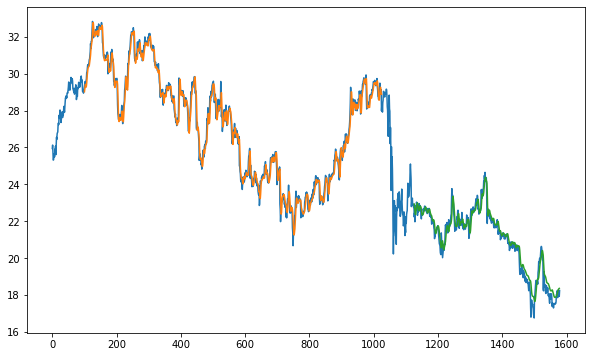

In [125]:
## plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
## plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting AT&T Stock Using ARIMA Model

## Step 1

In [126]:
!pip install pmdarima

In [127]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [128]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('T1.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.740181,25.944109,25.679758,25.944109,17.577383,42076058
2016-01-05,25.944109,26.200907,25.770393,26.125378,17.700195,40656465
2016-01-06,25.543806,25.838369,25.468279,25.725077,17.674246,35631223
2016-01-07,25.392750,25.755287,25.309668,25.309668,17.388844,46487494
2016-01-08,25.506042,25.649548,25.234138,25.332327,17.404419,37192219
...,...,...,...,...,...,...
2022-04-04,18.013596,18.277946,17.802114,18.262840,18.003277,47195569
2022-04-05,18.104231,18.240181,18.013596,18.043806,17.787355,43936808
2022-04-06,17.960726,18.232628,17.824774,18.149548,17.891594,49327209


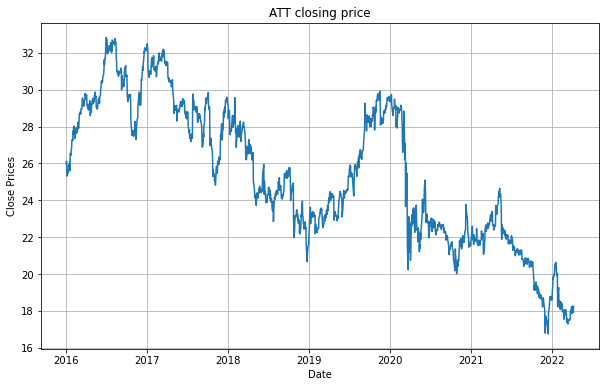

In [129]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ATT closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

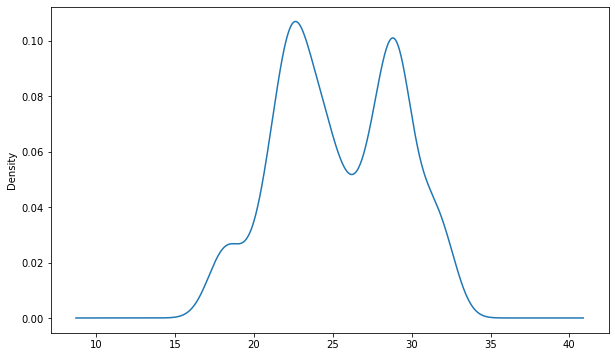

In [130]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

In [131]:
df_close = np.log(df_close)
print(df_close)

Date
2016-01-04    3.255945
2016-01-05    3.262907
2016-01-06    3.247466
2016-01-07    3.231186
2016-01-08    3.232081
                ...   
2022-04-04    2.904868
2022-04-05    2.892802
2022-04-06    2.898646
2022-04-07    2.886083
2022-04-08    2.903213
Name: Close, Length: 1579, dtype: float64


## 2d. Show comprehensive summary statistics.

In [132]:
from scipy import stats
stats.describe(df_close)

DescribeResult(nobs=1579, minmax=(2.8180825666546756, 3.491413548378453), mean=3.2222045138929327, variance=0.024299966169837848, skewness=-0.30890718936542805, kurtosis=-0.7334447910558364)

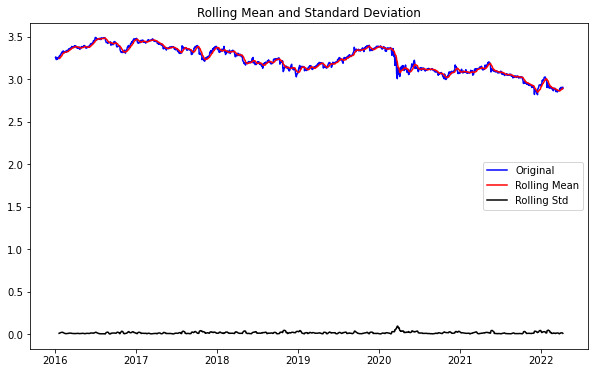

Results of dickey fuller test
Test Statistics                  -0.899729
p-value                           0.788062
No. of lags used                 13.000000
Number of observations used    1565.000000
critical value (1%)              -3.434535
critical value (5%)              -2.863389
critical value (10%)             -2.567754
dtype: float64


In [133]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

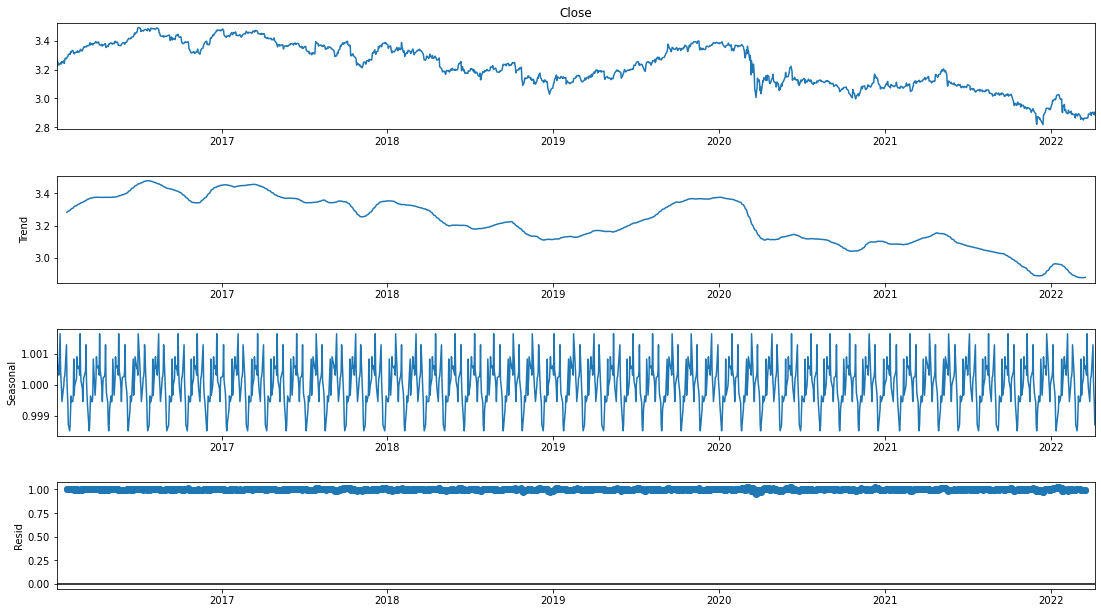

In [134]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


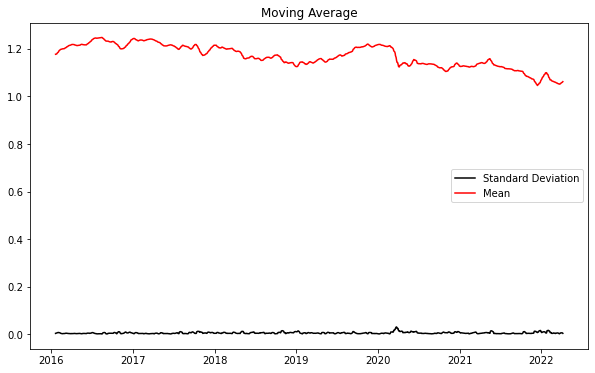

In [135]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

## Step 2

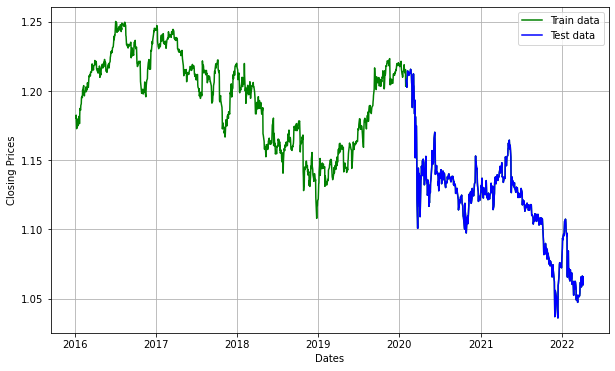

In [136]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.65)], df_log[int(len(df_log)*0.65):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

## Step 3

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8557.414, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8555.458, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8555.457, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8559.331, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8553.490, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.129 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1023
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4280.666
Date:                Tue, 03 May 2022   AIC                          -8559.331
Time:                        21:52:34   BIC                          -8554.402
Sample:                             0   HQIC                         -8557.460
                               - 1023                                  

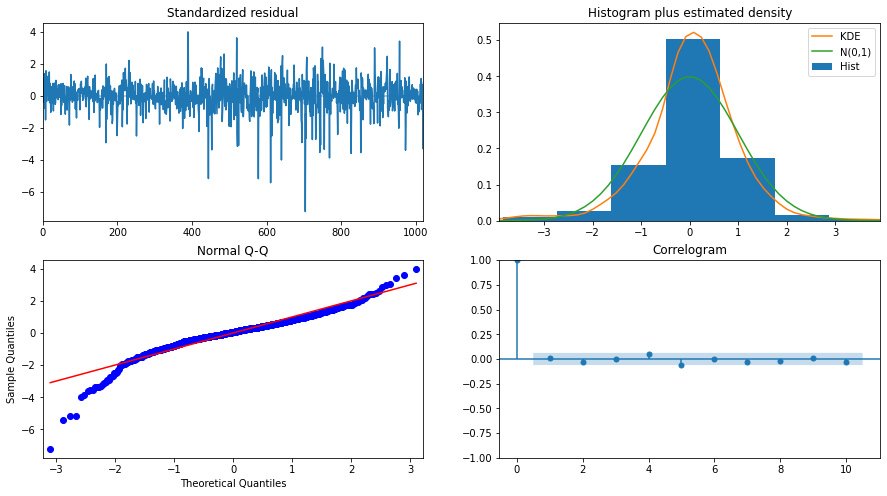

In [137]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [138]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1022
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4280.707
Method:                           css   S.D. of innovations              0.004
Date:                Tue, 03 May 2022   AIC                          -8557.414
Time:                        21:52:34   BIC                          -8547.555
Sample:                             1   HQIC                         -8553.671
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.294e-05      0.000      0.287      0.774      -0.000       0.000


In [139]:
# Forecast
fc, se, conf = fitted.forecast(553, alpha=0.05)  # 95% conf

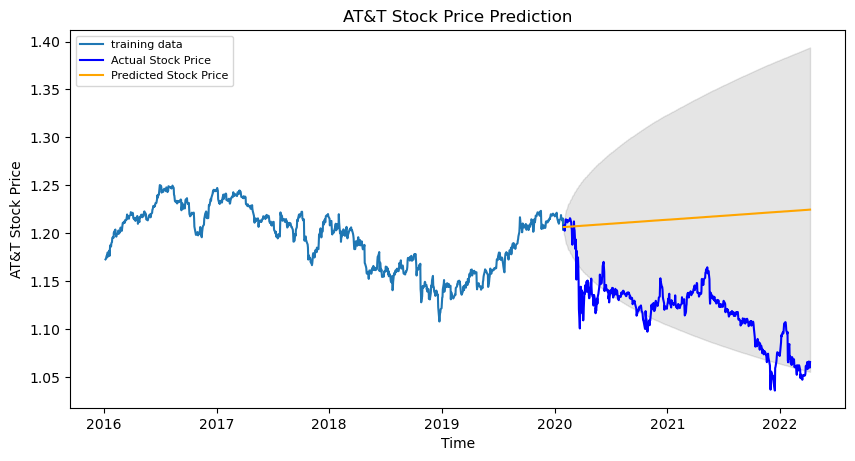

In [140]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('AT&T Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AT&T Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [141]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.010721351317937156
MAE: 0.09614682248541143
RMSE: 0.1035439583845294
MAPE: 0.08701107437800082


#### Result: We found that the RMSE of the ARIMA model is still smaller than that of the LSTM, so ARIMA still performs better, that is our findings are still robust to different model specifications.

## Predicting APPLE Stock Using LSTM Model

## Step 1

In [142]:
## data collection
import pandas_datareader as pdr
import pandas as pd

In [143]:
df = pd.read_csv('AAPL.csv')

In [144]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544688,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556002,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451721,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439793,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.482606,447610800


In [145]:
df1=df.reset_index()['Close']

In [146]:
df1.shape

(3089,)

In [147]:
df1

0         7.643214
1         7.656429
2         7.534643
3         7.520714
4         7.570714
           ...    
3084    178.440002
3085    175.059998
3086    171.830002
3087    172.139999
3088    170.089996
Name: Close, Length: 3089, dtype: float64

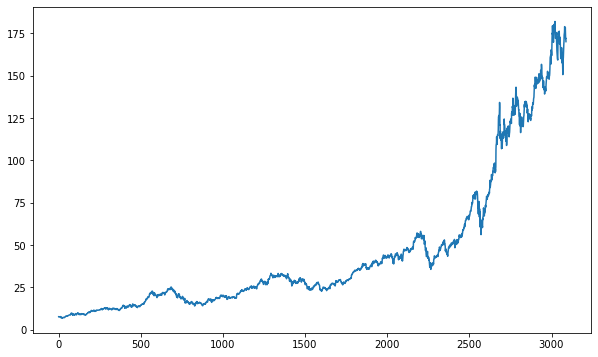

In [148]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [149]:
## LSTM are sensitive to the scale of the data, so we apply MinMax Scaler
import numpy as np

In [150]:
from sklearn.preprocessing import MinMaxScaler
##df1 = np.reshape(df1.values, (len(df1),1)) 
scaler=MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [151]:
df1.shape

(3089, 1)

In [152]:
df1

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.94187878],
       [0.94364867],
       [0.93194447]])

## 2d. Show comprehensive summary statistics.

In [153]:
from scipy import stats
stats.describe(df1)

DescribeResult(nobs=3089, minmax=(array([0.]), array([1.])), mean=array([0.2205747]), variance=array([0.05740328]), skewness=array([1.65262265]), kurtosis=array([1.67112476]))

## Step 2

In [154]:
## splitting dataset into train and test split
training_size =int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [155]:
training_size, test_size

(2007, 1082)

In [156]:
train_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.21265112],
       [0.20996771],
       [0.20969654]])

In [157]:
import numpy 
## convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ## i=0 0,1,2,3,...99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [158]:
## reshape ino=to X=t, t+1, t+2, t+3,...t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [159]:
print(X_train)

[[0.00447776 0.00455321 0.00385789 ... 0.01115567 0.01084166 0.01061532]
 [0.00455321 0.00385789 0.00377837 ... 0.01084166 0.01061532 0.01249941]
 [0.00385789 0.00377837 0.00406383 ... 0.01061532 0.01249941 0.0132192 ]
 ...
 [0.17987942 0.17574012 0.17422715 ... 0.20591408 0.20672767 0.2066563 ]
 [0.17574012 0.17422715 0.17312809 ... 0.20672767 0.2066563  0.20915414]
 [0.17422715 0.17312809 0.17501219 ... 0.2066563  0.20915414 0.21265112]]


In [160]:
print(X_train.shape),print(y_train.shape)

(1906, 100)
(1906,)


(None, None)

In [161]:
print(X_test.shape), print(ytest.shape)

(981, 100)
(981,)


(None, None)

## Step 3

In [162]:
## reshape input to be[samples, time steps, features] which is required for LSTM
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [163]:
## create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [164]:
model= Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [165]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [166]:
model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 [==============================] - 11s 205ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 2/100
30/30 [==============================] - 5s 172ms/step - loss: 8.7506e-05 - val_loss: 0.0011
Epoch 3/100
30/30 [==============================] - 5s 171ms/step - loss: 3.7583e-05 - val_loss: 0.0011
Epoch 4/100
30/30 [==============================] - 5s 176ms/step - loss: 3.2840e-05 - val_loss: 0.0011
Epoch 5/100
30/30 [==============================] - 5s 179ms/step - loss: 3.2632e-05 - val_loss: 0.0011
Epoch 6/100
30/30 [==============================] - 5s 173ms/step - loss: 3.2272e-05 - val_loss: 9.3815e-04
Epoch 7/100
30/30 [==============================] - 5s 177ms/step - loss: 3.3814e-05 - val_loss: 8.2696e-04
Epoch 8/100
30/30 [==============================] - 6s 186ms/step - loss: 3.0937e-05 - val_loss: 0.0011
Epoch 9/100
30/30 [==============================] - 5s 184ms/step - loss: 3.0992e-05 - val_loss: 8.2697e-04
Epoch 10/100
30/30 [==========================

## Step 4

In [167]:
import tensorflow as tf

In [168]:
## Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [169]:
## Rransformback to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [170]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.105369836698184

In [171]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

103.52522415279086

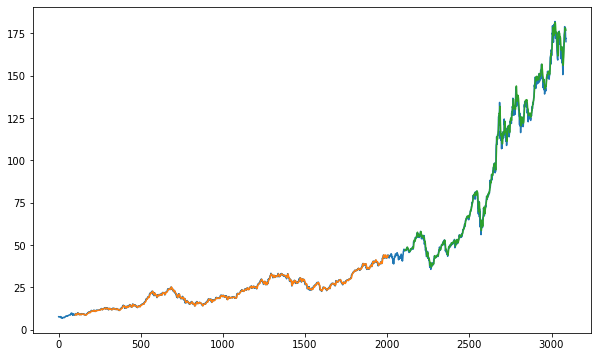

In [172]:
## plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
## plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting APPLE Stock Using ARIMA Mode

## Step 1

In [173]:
!pip install pmdarima

In [174]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [175]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('AAPL.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544688,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556002,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451721,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439793,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.482606,447610800
...,...,...,...,...,...,...
2022-04-04,174.570007,178.490005,174.440002,178.440002,178.440002,76468400
2022-04-05,177.500000,178.300003,174.419998,175.059998,175.059998,73401800
2022-04-06,172.360001,173.630005,170.130005,171.830002,171.830002,89058800


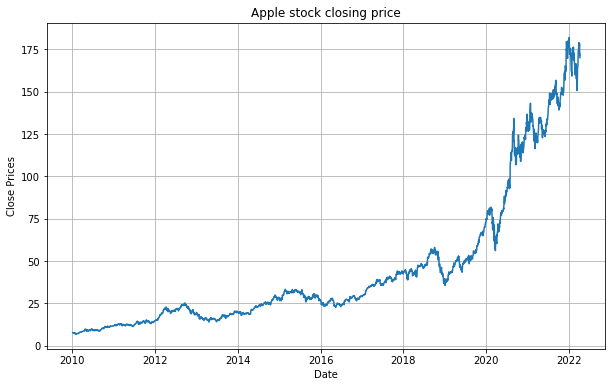

In [176]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Apple stock closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

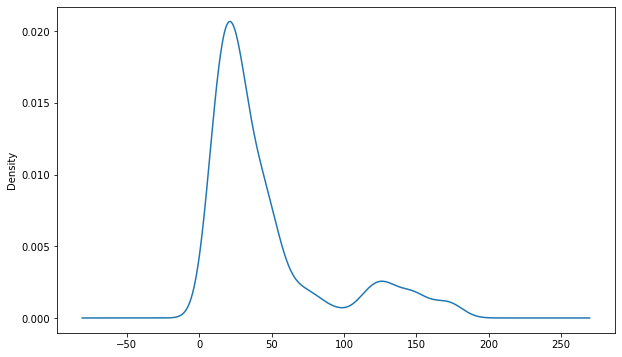

In [177]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

In [178]:
df_close = np.log(df_close)
print(df_close)

Date
2010-01-04    2.033818
2010-01-05    2.035546
2010-01-06    2.019511
2010-01-07    2.017661
2010-01-08    2.024287
                ...   
2022-04-04    5.184252
2022-04-05    5.165129
2022-04-06    5.146506
2022-04-07    5.148308
2022-04-08    5.136328
Name: Close, Length: 3089, dtype: float64


## 2d. Show comprehensive summary statistics.

In [179]:
from scipy import stats
stats.describe(df_close)

DescribeResult(nobs=3089, minmax=(1.9255513071004362, 5.204061603151298), mean=3.4786552902103436, variance=0.6368408738816038, skewness=0.41335815878295834, kurtosis=-0.5402713267397257)

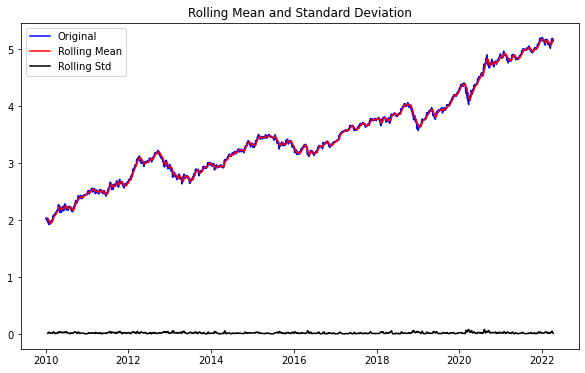

Results of dickey fuller test
Test Statistics                  -0.306544
p-value                           0.924572
No. of lags used                 14.000000
Number of observations used    3074.000000
critical value (1%)              -3.432479
critical value (5%)              -2.862481
critical value (10%)             -2.567271
dtype: float64


In [180]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

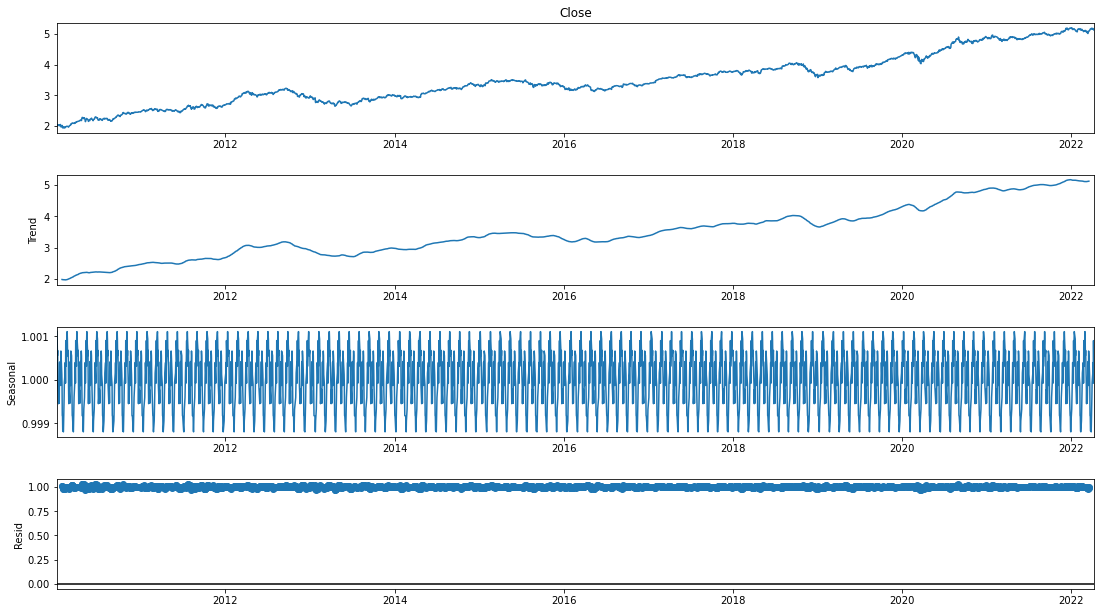

In [181]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


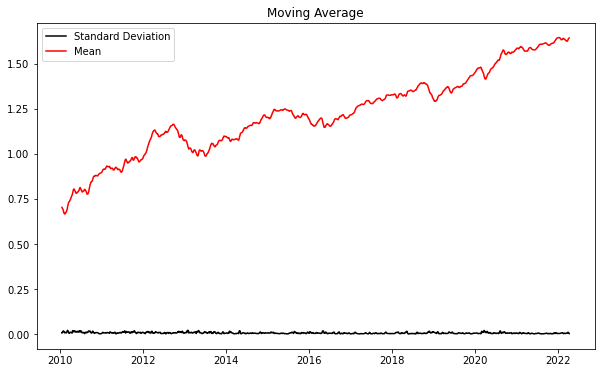

In [182]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

## Step 2

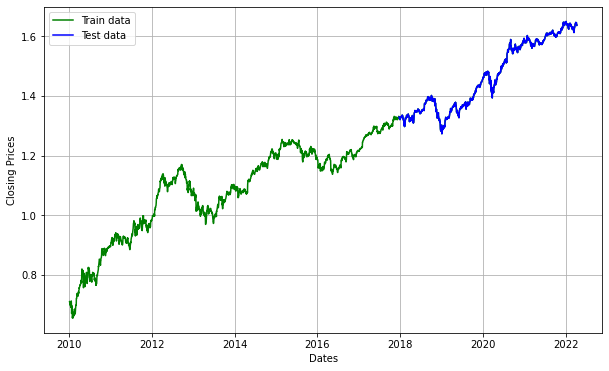

In [183]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.65)], df_log[int(len(df_log)*0.65):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

## Step 3

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15039.125, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15038.262, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15038.240, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15035.022, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15035.215, Time=0.64 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.937 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2004
Model:               SARIMAX(0, 1, 0)   Log Likelihood                7521.562
Date:                Tue, 03 May 2022   AIC                         -15039.125
Time:                        22:01:35   BIC                         -15027.920
Sample:                             0   HQIC                        -15035.011
                               - 2004                             

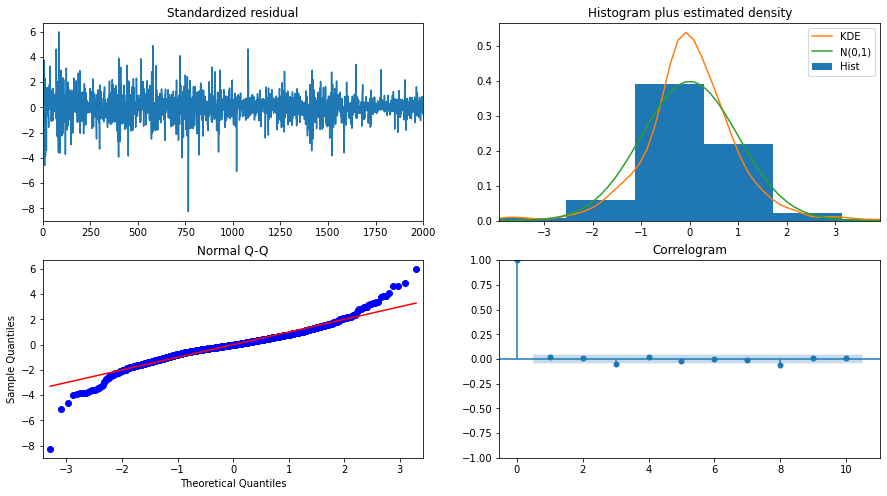

In [184]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [185]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2003
Model:                 ARIMA(0, 1, 0)   Log Likelihood                7521.562
Method:                           css   S.D. of innovations              0.006
Date:                Tue, 03 May 2022   AIC                         -15039.125
Time:                        22:01:35   BIC                         -15027.920
Sample:                             1   HQIC                        -15035.011
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.472      0.013    6.48e-05       0.001


## Step 4

In [186]:
# Forecast
fc, se, conf = fitted.forecast(1082, alpha=0.05)  # 95% conf

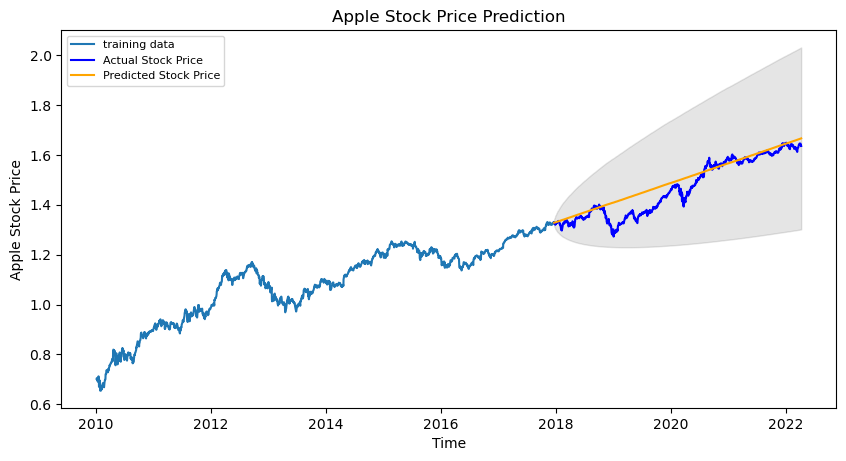

In [187]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [188]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.0022285464417299916
MAE: 0.034791852141827076
RMSE: 0.04720748289974791
MAPE: 0.024814010184005048


# 4. Findings 
## a. What are your main findings? 
#### The training set for each of our models consists of the previous 65% of the data, which is used to predict the next 35% of the data and compared to the real data.Finally, we found that the prediction of the stock prices of BOA, AT&T and Apple showed that the prediction effect of the ARIMA model was better than that of the LSTM model.The RMSE values predicted by the ARIMA model for BOA, AT&T, and Apple are 0.058, 0.112, and 0.047, respectively.The RMSE values predicted by LSTM for BOA, AT&T and Apple are 32.46, 22.90, 103.50, respectively.By comparison, we found that the RMSE obtained by the three companies with the ARIMA model is smaller than that of the LSTM model. So we think the ARIMA model is better at predicting stock prices.It is obvious that the ARIMA architecture outperforms LSTM’s performance. 

# 5. Conclusion
## a. Discuss what we’ve learned from your analysis. 
#### Defining an optimal model to forecast financial time series data is a challenging task because of the non-linearity, non- stationarity and volatility characteristics of this type of data.ARIMA models have great potential as candidates for time series modeling and forecasting. In this paper we compared two forecasting models for financial time series. This predictive analysis showed that, although the ARIMA model provides satisfactory results, LSTM models may be more efficient than ARIMA models,as compared with  ARIMA models, LSTM is much more easy to construct. When we use the ARIMA model, we have to transfer our data to stationary data. We also have to adjust parameters of p, d and q to ensure we have an efficient model. But for LSTM, as a method of machine learning, we only need to implement the model directly rather than continuous comparison between different parameters of the model.But overall, the ARIMA model was found to be more accurate in predicting stock prices as we varied the models and companies.

## b. Discuss any questions that could be answered in the future.
#### There are some questions worth discussing in the future. If we change the length of train years and test years, will our findings turn out to be different?  For the LSTM model, if we adjust the time steps, how will the result change?  It is also worth thinking about how to find appropriate parameters that can make a prediction precisely but not have the problem of overfitting.


# Reference
#### 【1】Stoean C, Paja W, Stoean R, Sandita A. Deep architectures for long-term stock price prediction with a heuristic-based strategy for trading simulations. Plos One. 2019Oct;14(10).
#### 【2】S. Siami-Namini, N. Tavakoli and A. Siami Namin, "A Comparison of ARIMA and LSTM in Forecasting Time Series," 2018 17th IEEE International Conference on Machine Learning and Applications (ICMLA), 2018, pp. 1394-1401, doi: 10.1109/ICMLA.2018.00227.
#### 【3】Rhanoui, M., Yousfi, S., Mikram, M., &amp; Merizak, H. (2019). Forecasting financial budget time series: Arima random walk vs LSTM neural network. IAES International Journal of Artificial Intelligence (IJ-AI), 8(4), 317. 
#### 【4】Pflaumer, P. (1992). Forecasting US population totals with the box-jenkins approach. International Journal of Forecasting, 8(3), 329–338.